Odrediti regresioni model kojim se predvidja cena kuca. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets 
from sklearn import preprocessing

In [2]:
data = datasets.load_boston()

In [3]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = data.data

In [6]:
x.shape

(506, 13)

In [7]:
y = data.target

In [8]:
y.shape

(506,)

In [9]:
# za prelazak na pandas strukture, moze se iskoristiti 
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["MEDV"])

Neki uvidi u vrednosti pojedinacnih atributa i njihove medjusobne zavisnosti.

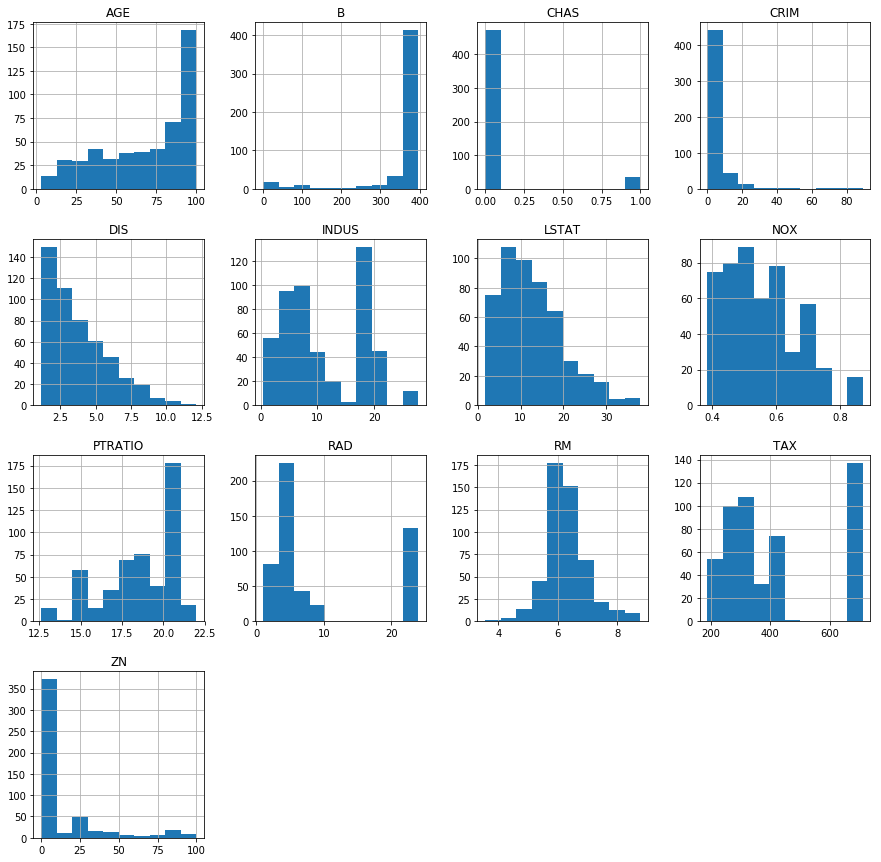

In [10]:
pd.DataFrame.hist(x, figsize = [15,15]);

In [11]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


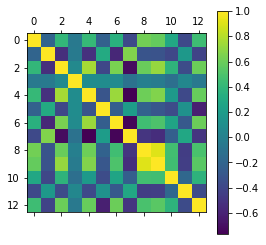

In [24]:
plt.matshow(x.corr())
plt.colorbar()

In [25]:
number_of_features = x.shape[1]
print('Number of features: {}'.format(number_of_features))

Number of features: 13


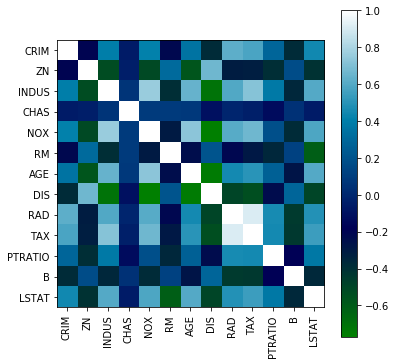

In [13]:
plt.figure(figsize = (6, 6))
plt.xticks(range(0, number_of_features), data.feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), data.feature_names)
plt.imshow(x.corr(), cmap='ocean')
plt.colorbar()

In [14]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 7)

In [15]:
# podaci se odnose na razlicite fizicke velicine i njihove vrednosti su na razlicitim skalama 
# ima smisla baviti se pretprocesiranjem podataka 

In [16]:
# x_means = np.mean(x, axis=0)
# x_std = np.std(x, axis=0)
# x_normalized = x-x_means/x_std

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Ucenje modela**

In [18]:
model = linear_model.LinearRegression()

In [19]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Evaluacija modela**

In [20]:
y_predicted = model.predict(x_test)

In [21]:
metrics.mean_squared_error(y_predicted, y_test)

25.290803639932346

**Konacni model**

In [22]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)